### Hello everyone

###### Welcome in this place

This is a simple example of wordcloud in Python.

###### STRATEGY

THe strategy for this notebook is quite easy:

    1) laod the data. I chosed "Hamlet" written by Shakespeare as corpus. You can find easly a free download of a .txt online.

    2) clean text

    3) make wordcloud

    4) make a funny wordcloud

In [1]:
from wordcloud import WordCloud

import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt

from os import path
from PIL import Image

In [2]:
print("load text...", end="\n\n")
hamlet = open('db/hamlet.txt').read()
hamlet[0:1000] 

load text...



"Project Gutenberg Etext of Hamlet by Shakespeare\nPG has multiple editions of William Shakespeare's Complete Works\n\n\nCopyright laws are changing all over the world, be sure to check\nthe copyright laws for your country before posting these files!!\n\nPlease take a look at the important information in this header.\nWe encourage you to keep this file on your own disk, keeping an\nelectronic path open for the next readers.  Do not remove this.\n\n\n**Welcome To The World of Free Plain Vanilla Electronic Texts**\n\n**Etexts Readable By Both Humans and By Computers, Since 1971**\n\n*These Etexts Prepared By Hundreds of Volunteers and Donations*\n\nInformation on contacting Project Gutenberg to get Etexts, and\nfurther information is included below.  We need your donations.\n\n\nHamlet, Prince of Denmark\n\nby William Shakespeare [Collins edition]\n\nNovember, 1998 [Etext #1524]\n\n\nProject Gutenberg Etext of Hamlet by Shakespeare\n******This file should be named 2ws2610.txt or 2ws2610.

## Let's clean

In [3]:
print("spitting...", end="\n\n")
hamlet = hamlet.split("\n")
print(hamlet[0:20], end="\n\n\n")

print("skip the first part and rejoin...", end="\n\n")
hamlet = " ".join(hamlet[336:])
print(hamlet[0:1000], end="\n\n\n")

print("deleting words between brackets...", end="\n\n")
hamlet = re.sub("[\(\[].*?[\)\]]", "", hamlet)
print(hamlet[0:1000], end="\n\n\n")

print("deleting main characters...", end="\n\n")
character = ['Ber\.','Fran\.','Hor\.','Mar\.','Cor\.','Ham\.','Queen\.','King\.','Oph\.','Pol\.','He\.']
pattern = re.compile(r'|'.join(character))
hamlet = pattern.sub('', hamlet)
print(hamlet[0:1000], end="\n\n\n")

eng_stop = nltk.corpus.stopwords.words('english')

def fast_clean(x):
    x = re.sub('[^A-Za-z]+', ' ', x)
    x = x.lower().strip()
    return(x)

print("removing stopwords, lower and strip and removing 1-char words...", end="\n\n")
hamlet = fast_clean(hamlet)
hamlet = [h for h in hamlet.split() if h not in eng_stop]
hamlet = " ".join([ h for h in hamlet if len(h)>1])
print(hamlet[0:1000], end="\n\n\n")

spitting...

['Project Gutenberg Etext of Hamlet by Shakespeare', "PG has multiple editions of William Shakespeare's Complete Works", '', '', 'Copyright laws are changing all over the world, be sure to check', 'the copyright laws for your country before posting these files!!', '', 'Please take a look at the important information in this header.', 'We encourage you to keep this file on your own disk, keeping an', 'electronic path open for the next readers.  Do not remove this.', '', '', '**Welcome To The World of Free Plain Vanilla Electronic Texts**', '', '**Etexts Readable By Both Humans and By Computers, Since 1971**', '', '*These Etexts Prepared By Hundreds of Volunteers and Donations*', '', 'Information on contacting Project Gutenberg to get Etexts, and', 'further information is included below.  We need your donations.']


skip the first part and rejoin...

 Ber. Who's there?  Fran. Nay, answer me: stand, and unfold yourself.  Ber. Long live the king!  Fran. Bernardo?  Ber. He.  Fr

## Wordcloud 

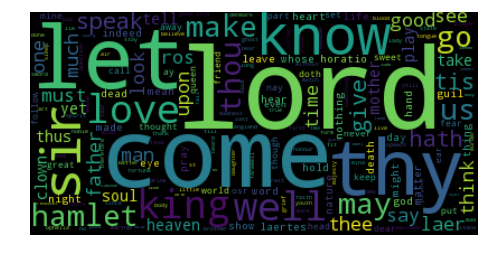

load funny image...

from image to 2d-array...



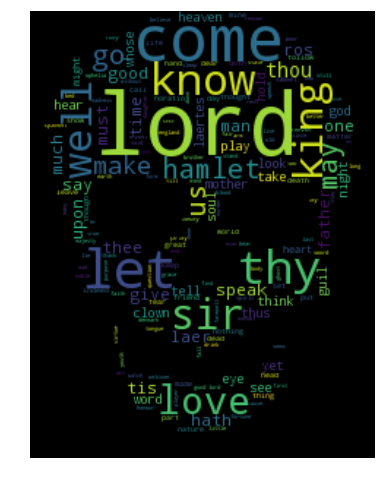

In [4]:
wc = WordCloud(background_color="black", max_words=2000)
wc.generate(hamlet)

plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

print("load funny image...", end="\n\n")
im = Image.open('db/mask.jpg')
im = im.convert('L')

print("from image to 2d-array...", end="\n\n")
funny = np.fromiter(iter(im.getdata()), np.uint8)
funny.resize(im.height, im.width)

wc = WordCloud(background_color="black", max_words=2000, mask=funny)
wc.generate(hamlet)

plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

###### CONCLUSION

I do not have a real conclusion for this notebook. 

Just remember if you want to make to custom a wordcloud,you have to use a white/black image.

I would really appreciate to be contacted for new points of view or advices as well as better solutions.

######  I hope you will appreciate these examples. See you around,
###### Federico